Laboratório de controle - 2023.2\
Turma: T03

Coordenador: Cleison Silva

<br>

Grupo 4:

Andrez Muller Miranda Barreto\
Matrícula: 201833940007

Oséias Dias de Farias\
Matrícula: 201733940002

Thalia Damasceno Barroso\
Matrícula: 201633940040

Hebert Barroso\
Matrícula: 201733940007

<br>

## **<center> Modelagem de sistema por função de transferência pulsada </center>**

### **Objetivo:**

- Encontrar a função de transferência pulsada de uma planta real.


# Contextualização e introdução teórica

O objetivo deste experimento é encontrar uma representação matemática que descreva como um sistema LIT se comporta. Para isso, são utilizados os sinais que são aplicados na entrada e observados na saída do sistema. Como esses sinais são amostrados em intervalos de tempo discretos, é utilizado um modelo de função de transferência discreta, que leva em conta essa característica.

## Resumo teórico sobre Identificação de Sistemas

Uma função de tranferência no domínio $z$ de ordem $N$ pode ser expressa da seguinte forma:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\sum\limits_{m=1}^{M}b_m z^{-m}}
{1 + \sum\limits_{n=1}^{N}a_nz^{-n}} \tag{1}$$

Em que $X(z)$ e $Y(z)$  representam a transformada $z$ dos sinais de entada e de saída, respectivamente.

Ao desenvolver os somatórios temos

$$ H(z) = \frac{ b_1z^{-1}+\dotsb+b_{M} z^{-M}}
{1+a_1z^{-1}+\dotsb+a_Nz^{-N}} \tag{2}$$

Ao aplicar a transformada $z$ inversa, obtem-se a equação de diferenças equivalente,

$$ y[k] = -a_1y[k-1] - \dotsb - a_N y[k-N]
+ b_1 x[k - 1] + \dotsb + b_M x[k-N] \tag{3}$$

Observe que se tem um sistema de equações dado por:

$$ \mathbf{y = \Psi \theta} \tag{4}$$

em que $\mathbf{\Psi}$ é a matriz de regressores e definida como segue,  

$$ \mathbf{\Psi} = \begin{bmatrix}
-y[k-1] & \dotsb & -y[k-N] & x[k-1] & \dotsb & x[k-M]
\end{bmatrix} \tag{5}$$

Ao expandir para uma quantidade $N_{a}$ de amostras, a equação (4) tem-se

$$ \begin{bmatrix} y[0]\\ y[1] \\ \vdots\\ y[N_a] \end{bmatrix} = \begin{bmatrix} -y[0-1] & \dotsb & -y[0-N] & x[0-1] & \dotsb & x[0-M]\\-y[1-1] & \dotsb & -y[1-N] &
 x[1-1] & \dotsb & x[1-M]\\ \vdots & \dotsb & \vdots &
\vdots & \dotsb & \vdots \\-y[N_a-1] & \dotsb & -y[N_a-N] &
x[N_a-1] & \dotsb & x[N_a-M]   \end{bmatrix} \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix}$$

A matriz $\Psi$ é denomida de matriz de regressores por ser formada (no porcesso de construção) pelos termos do modelo (equação de diferenças) referentes aos sinais de entrada e de saída atrasados no tempo discreto. 

OBS: o coeficiente $b_0$ é zero, o que indica nenhuma conexão direta entre a entrada e a saída do sistema.

O vetor $\mathbf{\theta}$ é o vetor de coeficientes, definido como segue,

$$ \mathbf{\theta} = \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix} \tag{6}$$

e $\mathbf{y}$ é o vetor de saída no instante de tempo atual (k) . 

Para cada instante de tempo tem-se uma equação distinta, formando um sistema sobredeterminado, o que implica que não há solução exata. Para fins de práticos, uma aproximação é o suficiente. 

Observe que o problema de identificação é formulado de tal forma que os vetores de entrada e saída são conhecidos a partir dos sinais, dessa forma deve-se detrminar o vetor de coeficientes.

<p align='justify'>Para determinar o vetor de coeficientes utiliza-se o sistema de equações para formular um problema de mínimos quadrados, obtendo assim a seguinte expressão:</p>

$$ \mathbf{\theta}^{*} = \mathbf{\left(\Psi^T\Psi \right)^{-1}\Psi^Ty} \tag{7}$$

<p align='justify'>Após determinar o vetor de coeficientes pode-se substituir os valores obtidos na função de transferência proposta inicialmente e definir o modelo.</p>



## Validação do modelo

<p align='justify'>Tipicamente em Identificação de Sistemas, sempre que levantado um modelo deve-se valida-lo, pois é crucial analisar se o mesmo de fato descreve de maneira aproximada a dinâmica do sistema.</p>

<p align='justify'>Existem diversos métodos para validar um modelo, aqui iremos optar por utilizar uma métrica chamada Erro Quadrático Médio (EQM). Esse método consiste em calcular a média das diferenças ao quadrado entre o sinal observado e o sinal predito, que resulta na seguite expressão:</p>

$$ EQM = \frac{1}{N_a - 1}\sum\limits_{i=0}^{N_a - 1}( y_i - \hat{y}_i)^2 \tag{8}$$

onde $N_a$ é número de amostra dos dados, $y_i$ é a $i$-ésima amostra do sinal observado e $\hat{y}_i$ é a $i$-ésima amostra do sinal predito pelo modelo. No geral quanto menor for o valor do EQM, mais a resposta do modelo se aproxima ao sistema real.

## Passos de execução

Considere a seguinte sequência de passos para resolver o problema de modelagem:

1. Obter os dados de entrada e de saída do sistema;
2. Dividir os dados obtidos em dados para treino e validação;
3. Definir a função de transferência de representará o sistema;
4. Criar a matriz de regressores;
5. Encontrar o vetor de coeficientes pela formulação de mínimos quadrados;
6. Substituir os coeficientes e encontrar a função de tranferência pulsada da planta.
7. Validar o modelo encontrado.

<p align='justify'>Vale destacar para o passo 1, que a entrada aplicada na planta no contexto de Identificação de Sistemas geralmente é um sinal chamado Pseudo Random Binary Sequence (PRBS). Esse sinal tem o propósito de extrair da planta o máximo de informação sobre a dinâmica de transitórios. </p>

In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from sklearn.metrics import mean_squared_error


import scienceplots

%config InlineBackend.figure_format="retina"
plt.style.use(["science", "notebook"])

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)        
plt.rc('axes', titlesize=BIGGER_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)  
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIGGER_SIZE)

## Passo 1

Foi realizado ensaios para se obter os sinais de entrada e saída do sistema.

#### **Carregando os dados do ensaio**

In [448]:
dados_prbs_malha_aberta = pd.read_csv("prbs_ma_7_5_v2.csv", sep=";", header = None).values
dados_prbs_malha_aberta

array([[0.000e+00, 7.500e+00, 0.000e+00],
       [2.000e-02, 7.500e+00, 0.000e+00],
       [4.000e-02, 7.500e+00, 1.900e-01],
       ...,
       [2.042e+01, 8.500e+00, 2.470e+00],
       [2.044e+01, 8.500e+00, 2.490e+00],
       [2.046e+01, 8.500e+00, 2.500e+00]])

#### **Separando os dados**

+ tempo: instantes de tempo de cada amostra
+ sinal_entrada:  Sinal de entrada aplicado a planta, tensão aplicada aos terminais do motor.
+ sinal_saida: Sinal de saída do sistema, tensão nos terminais do gerador

In [449]:
# Dados
tempo = np.array(dados_prbs_malha_aberta[:, 0])
sinal_entrada  = np.array(dados_prbs_malha_aberta[:, 1])
sinal_saida = np.array(dados_prbs_malha_aberta[:, 2])

Ts = 0.02
print('\nPeriodo de Amostragem:', Ts)


Periodo de Amostragem: 0.02


#### **Gráficos dos sinais**

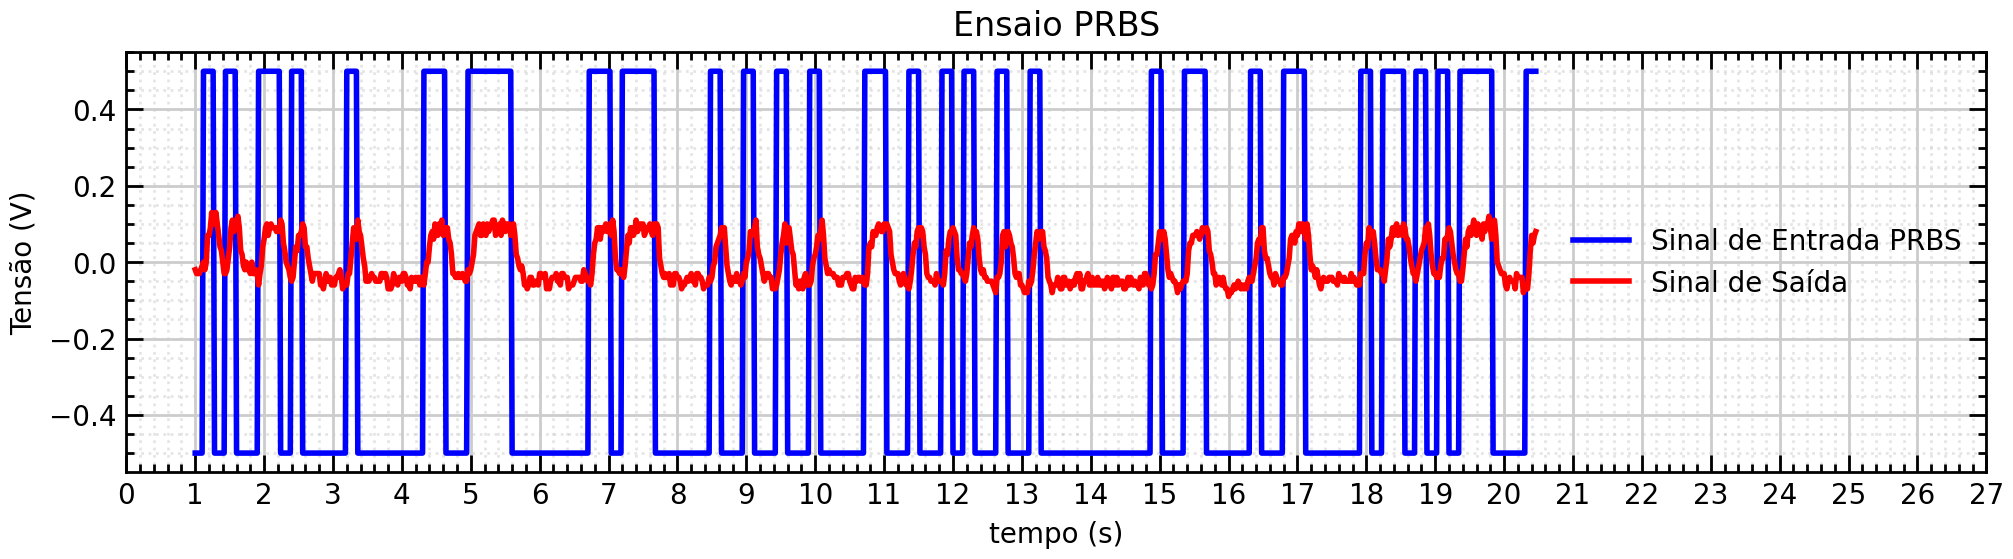

In [450]:

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(tempo[50:], sinal_entrada[50:] - 8, c = 'b', label = "Sinal de Entrada PRBS")
plt.plot(tempo[50:], sinal_saida[50:] - (np.mean(sinal_saida[50:])),
         c = 'r', label = "Sinal de Saída")
plt.xticks(range(0, 28))

plt. title('Ensaio PRBS', fontsize=12)
plt.ylabel('Tensão (V)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10, loc="center right")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

In [451]:
media_entrada = np.mean(sinal_entrada[50:])

entradas_mix = sinal_entrada[50:] < media_entrada
entradas_mix1 = []
for n, i in enumerate(sinal_entrada[50:]):
    if entradas_mix[n]:
        entradas_mix1.append(i)

media_entrada_min = np.mean(entradas_mix1)


entradas_max = sinal_entrada[50:] > media_entrada
entradas_max1 = []
for n, i in enumerate(sinal_entrada[50:]):
    if entradas_max[n]:
        entradas_max1.append(i)
media_entrada_max = np.mean(entradas_max1)

excursao_amplitude_entrada = media_entrada_max - media_entrada_min

print(f"\nValor médio do sinal de entrada: {media_entrada}")
print(f"Excursão em amplitude do sinal de entrada: {excursao_amplitude_entrada}\n")


Valor médio do sinal de entrada: 7.853182751540041
Excursão em amplitude do sinal de entrada: 1.0



In [452]:
media_saida = np.mean(sinal_saida[50:])

saida_mix = sinal_saida[50:] < media_saida
saida_mix1 = []
for n, i in enumerate(sinal_saida[50:]):
    if saida_mix[n]:
        saida_mix1.append(i)
media_saida_min = np.mean(saida_mix1)


saida_max = sinal_saida[50:] > media_saida
saida_max1 = []
for n, i in enumerate(sinal_saida[50:]):
    if saida_max[n]:
        saida_max1.append(i)
media_saida_max = np.mean(saida_max1)

excursao_amplitude_saida = media_saida_max - media_saida_min

print(f"\nValor médio do sinal de saída: {media_saida}")
print(f"Excursão em amplitude do sinal de saída: {excursao_amplitude_saida}\n")


Valor médio do sinal de saída: 2.4198254620123203
Excursão em amplitude do sinal de saída: 0.1086810782426042



# Exercício 01

Responda:

1. Qual é a excursão em amplitude dos sinais de entrada (sinal PRBS) e de saída?

    ***excursão em amplitude dos sinais de entrada (sinal PRBS): 1.0V***\
    ***excursão em amplitude dos sinais de saída: 0.108V***

1. Qual é o valor médio dos sinais de entrada e de saída ?

    ***Valor médio do sinal de entrada: 7.853 V***\
    ***Valor médio do sinal de saída: 2.4198 V***

2. Por quê os sinais de entrada e de saída são diferentes ? Quais são as semelhanças ?

    ***Os sinais são doferentes por conta da dinámica do sistema, podemos observar que o sistema possui ganho não unitário, por isso o sinal de saída tem amplitude menor que o de entrada, suas semelhança está no fato de o sinal de saída acopanhar a tendência do sinal de entrada, quando o sinal de entrada cresce o de saída também possui essa dinâmica, além disso, quando o sinal de entrada satura em um valor o de saída também satura***

3. Como você descreveria o comportamento do sistema com base na resposta para entrada PRBS ?

    ***O sistema é não linear, por mostrar uma dinâmica irregular entre as diferentes frequências aplicada***

# Passo 2

Os dados são dividimos em dois subconjuntos: o de treino e de teste conforme o código abaixo.

In [453]:
# vetores de intervalos
intervalo_train = np.arange(50, 700)
intervalo_test = np.arange(700, 1024)

# Vetores de tempo
t_train, t_test = (dados_prbs_malha_aberta[intervalo_train, 0],
                   dados_prbs_malha_aberta[intervalo_test, 0])

# Vetores da entrada
xtrain, xtest = (dados_prbs_malha_aberta[intervalo_train, 1],
                 dados_prbs_malha_aberta[intervalo_test, 1])

# Vetores da saída
y_offset = np.mean(dados_prbs_malha_aberta[intervalo_train, 2])
ytrain, ytest = (dados_prbs_malha_aberta[intervalo_train, 2],
                 dados_prbs_malha_aberta[intervalo_test, 2])

# Passo 3

Nesse passo deve-se determinar a ordem da função de transferência pulsada. Uma seleção arbitrária seria a primeira ordem, substituindo o valor de $N = 1$ na Eq. 1 obtem-se:

$$ H(z) = \frac{b_0+b_1z^{-1}}
{1+a_1z^{-1}} \tag{9}$$

Observe que $M=1$ é adotado.

Novamente, desatca-se que considera-se $b_0 = 0$, isso fará com que a função de transferência não tenha zeros finitos. Logo, temos:

$$
    H(z) = \frac{b_1z^{-1}}
    {1+a_1z^{-1}} \tag{10}
$$

expressando na forma de equação de diferenças:

$$ y[n] = -a_1y[n-1] + b_1x[n-1] \tag{11}$$

Dessa forma, já podemos desenvolver o código para calcular os coeficientes.

# Passo 4

A matriz de regressores pode ser montada através do código abaixo.

In [454]:
# Variável tempo discreto (amostras)
k = np.arange(1, len(xtrain))

# Matriz de Regressores (Primeira Ordem)
PSI = np.array([-ytrain[k-1], xtrain[k-1]]).T

# Passo 5

Podemos expressar a Equação 7 em forma de código e calcular o vetor de coeficientes conforme segue.
$$ \mathbf{\theta}^{*} = \mathbf{\left(\Psi^T\Psi \right)^{-1}\Psi^Ty} $$

In [455]:
# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Passo 6

Sistema de Primeira Ordem

Substituindo os coeficientes na Eq. 10 obtemos a funções de transferência pulsado do sistema conforme o código abaixo.

In [456]:
# Separando os coeficientes
a1, b1 = teta

# Numerador de H(z)
B = [b1]

# Denominador de H(z)
A = [1, a1]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo))
print('\nPeríodo de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z):\n")

Gz


Período de Amostragem: 0.019999999999999657

 G(z):



TransferFunction(array([0.02877586]), array([ 1.        , -0.90668769]), 0.019999999999999657)

In [457]:
print(f"\nZero do sistema: {ct.zeros(Gz)}")
print(f"Polo do sistema: {ct.poles(Gz)}\n")


Zero do sistema: []
Polo do sistema: [0.90668769+0.j]



Ao analisar o polo do sistema, podemos constatar que o sistema é estável já que o polo se encontra dentro do circulo unitário.

# Passo 7

<p align='justify'> Por ultimo, mas não menos importante, deve-se validar a função de transferência encontrada com os dados de teste. Para isso iremos utilizar a Eq. 8 para calcular o erro quadrático médio. A biblioteca scikit-learn já possui uma função para realizar esse cálculo conforme o código abaixo. Como observado o valor do erro foi relativamente baixo, o que nos mostra que o modelo está razoável.</p>

In [458]:
def resposta_forcada_e_mse(Gz):
    # Respostas da função de transferência para a entrada de validação.
    y_hat = ct.forced_response(Gz, U=xtest)[1]

    # Calculo do EQM comparando os dados observados com preditos.
    MSE = mean_squared_error(ytest[50:], y_hat[50:])
    print('\nErro médio quadrático: %.6f\n' % MSE)
    return y_hat

In [459]:
y_hat = resposta_forcada_e_mse(Gz)


Erro médio quadrático: 0.001677



<p align='justify'>Outra forma de visualizar se o modelo está satisfatório é comparando o gráfico dos valores preditos com os observados. Como é visto no gráfico abaixo, o modelo é satisfatório em alguns momentos, mas em outros fica distante o valor observado, uma forma de tentar melhorar o modelo seria aumentando a ordem a função de transfência.</p>

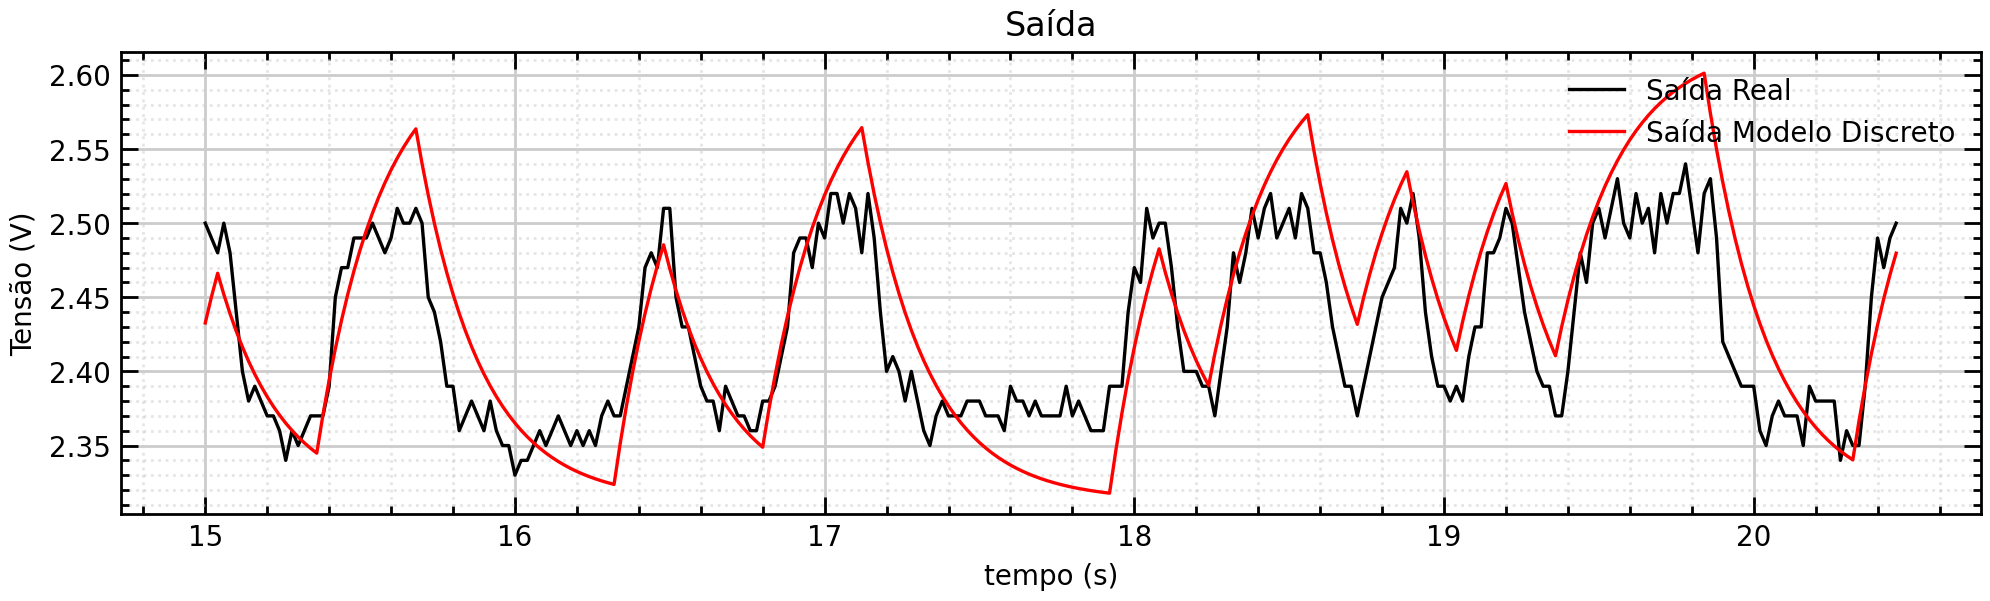

In [460]:
plt.figure(figsize=(12, 3))
plt.plot(t_test[50:], ytest[50:], '-k', linewidth=1.2, label='Saída Real')
plt.plot(t_test[50:], y_hat[50:], '-r', linewidth=1.2, label='Saída Modelo Discreto')
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='upper right')

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()


Erro médio quadrático: 0.001740



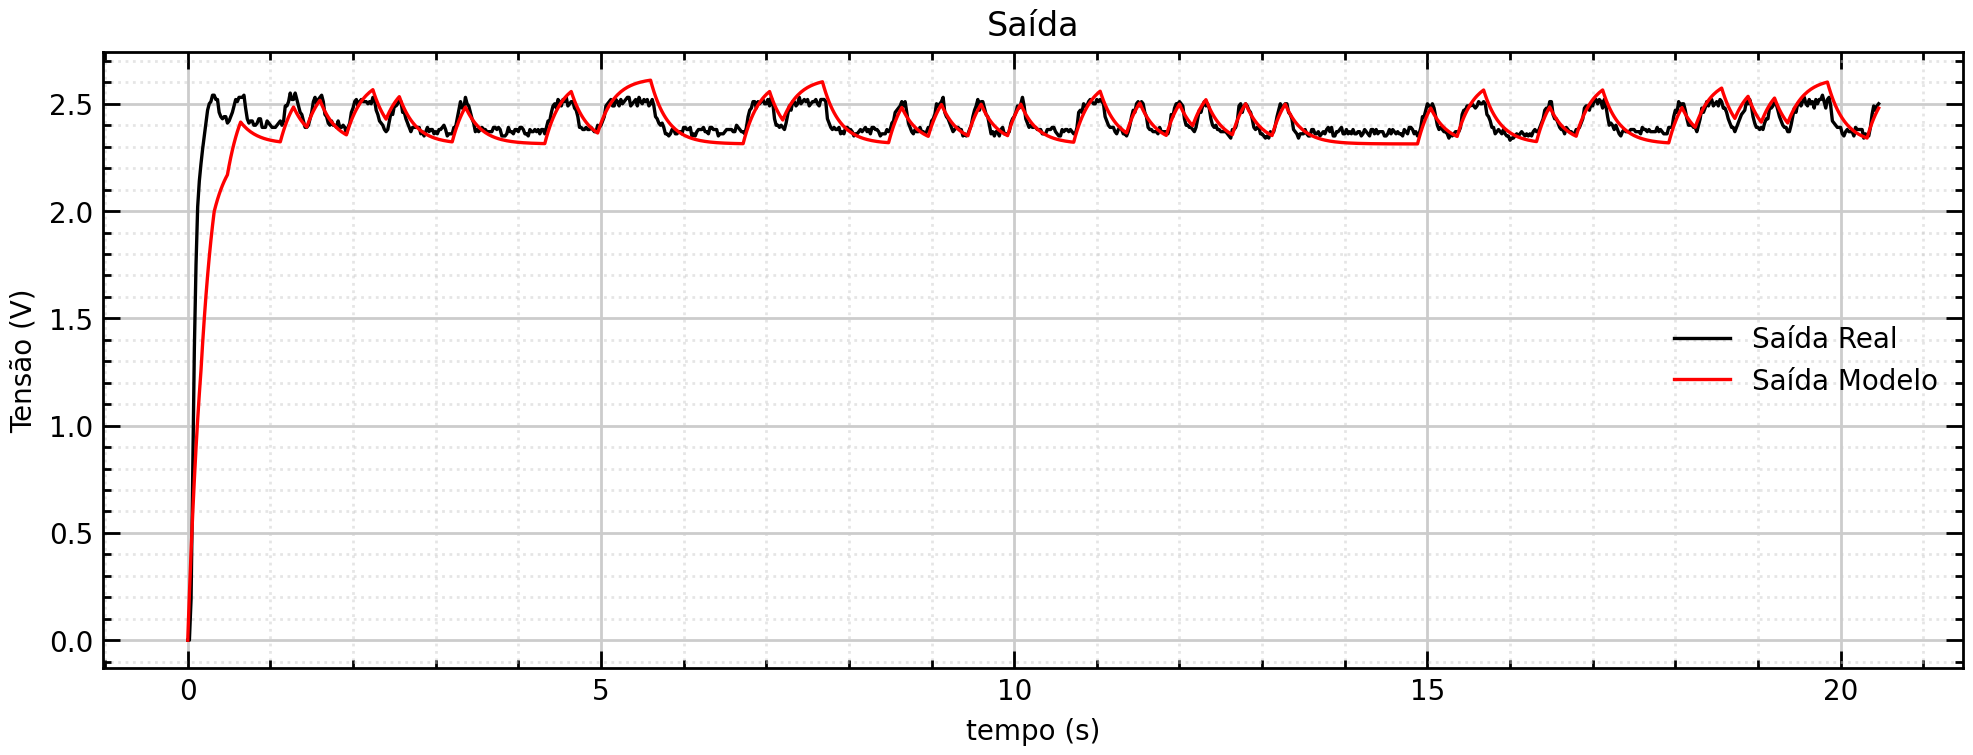

In [461]:
y_saida = ct.forced_response(Gz, U=sinal_entrada)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(sinal_saida[50:], y_saida[50:])
print('\nErro médio quadrático: %.6f\n' % MSE)

plt.figure(figsize=(12, 4))
plt.plot(tempo, sinal_saida, '-k', linewidth=1.2)
plt.plot(tempo, y_saida, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='center right', labels=('Saída Real', 'Saída Modelo'))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()


### Resposta ao Degrau unitário


In [462]:
### Resposta ao Degrau unitário
ct.step_info(Gz)

{'RiseTime': 0.43999999999999245,
 'SettlingTime': 0.7999999999999863,
 'SettlingMin': 0.27900069873902245,
 'SettlingMax': 0.3083822436164762,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.308382243616476,
 'PeakTime': 7.01999999999988,
 'SteadyStateValue': 0.3083822436164762}

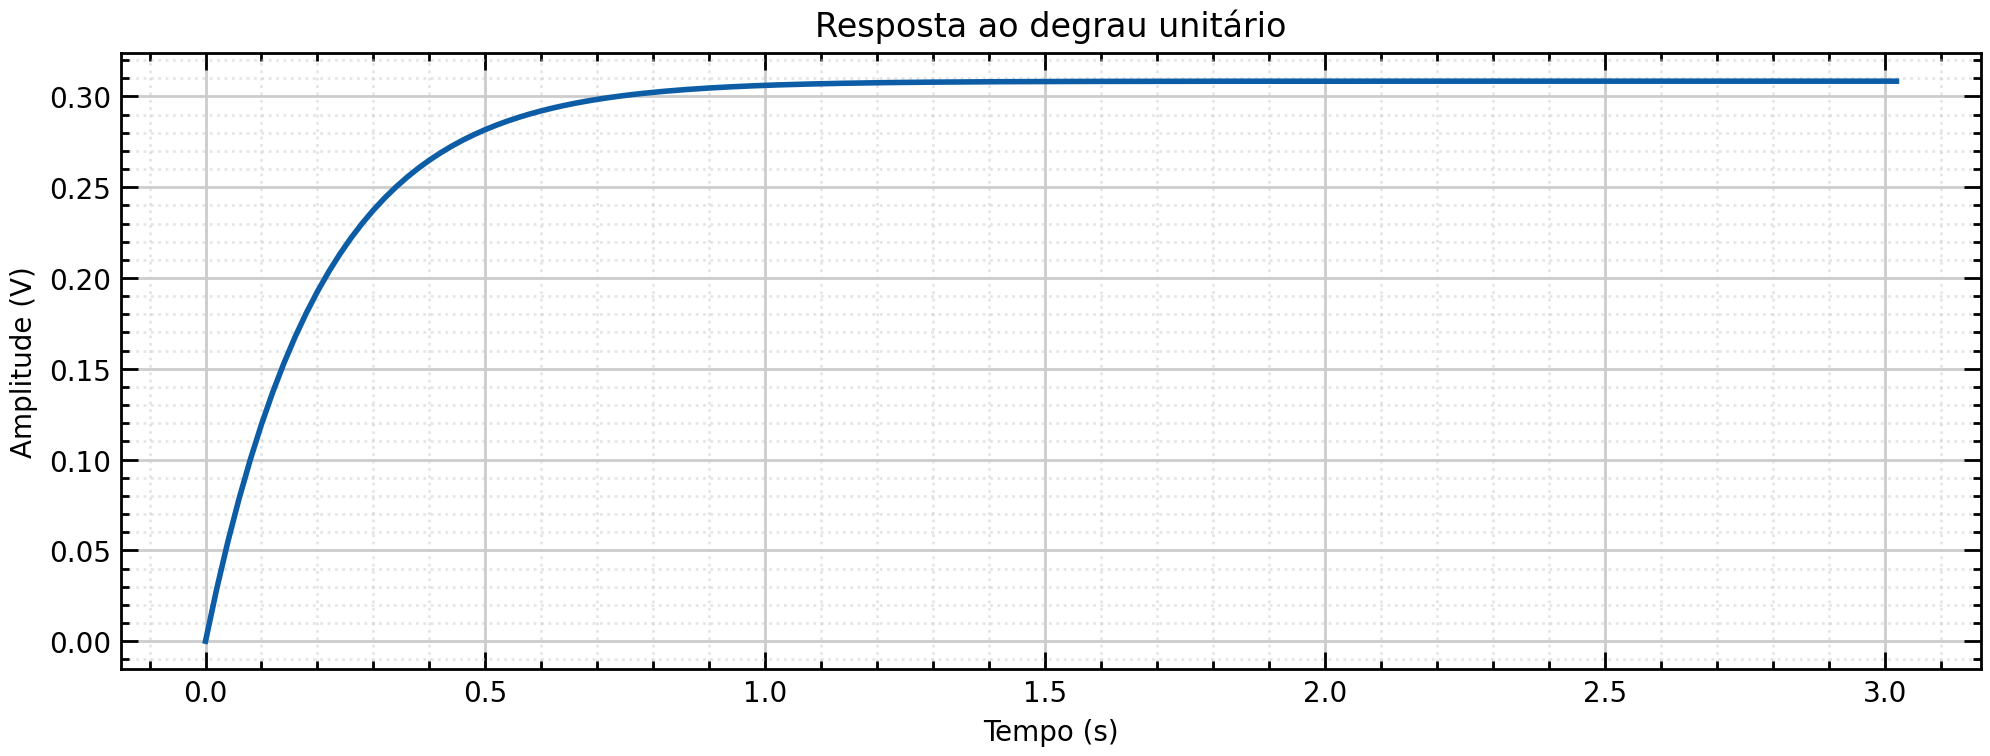

In [463]:
t, y = ct.step_response(Gz, 3)

plt.figure(figsize=(12, 4))
plt.plot(t, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (V)")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.show()

---

# Exercício 3

Refaça os passos para os seguintes casos:

1. N = 2 e M = 2, sistema segunda ordem;
2. N = 2 e M = 1, sistema segunda ordem;
3. N = 3 e M = 3, sistema terceira ordem;
4. N = 3 e M = 2, sistema terceira ordem;

Discuta os resultados com base no desenpenho da representação e na localização dos zeros do modelo.

---

## 1. N = 2 e M = 2, sistema segunda ordem

$$ H(z) = \frac{b_0+b_1z^{-1}+b_2z^{-2}}
{1+a_1z^{-1}+a_2z^{-2}} \tag{9}$$

Observe que $M=1$ é adotado.

Novamente, desatca-se que considera-se $b_0 = 0$, isso fará com que a função de transferência não tenha zeros finitos. Logo, temos:

$$
    H(z) = \frac{b_1z^{-1}+b_2z^{-2}}
    {1+a_1z^{-1}+a_2z^{-2}} \tag{10}
$$

expressando na forma de equação de diferenças:

$$ y[n] = - a_1y[n-1] - a_2y[n-2] + b_1x[n-1] + b_2x[n-2] \tag{11} $$

Dessa forma, já podemos desenvolver o código para calcular os coeficientes.

**A matriz de regressores pode ser montada através do código abaixo.**

In [464]:
# Variável tempo discreto (amostras)
k = np.arange(1, len(xtrain))

# Matriz de Regressores (Primeira Ordem)
PSI = np.array([-ytrain[k-1], -ytrain[k-2], xtrain[k-1], xtrain[k-2]]).T

**Podemos expressar a Equação 7 em forma de código e calcular o vetor de coeficientes conforme segue.**

In [465]:
# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

**Substituindo os coeficientes na Eq. 10 obtemos a funções de transferência pulsado do sistema conforme o código abaixo.**

In [466]:
# Separando os coeficientes
a1, a2, b1, b2 = teta

# Numerador de H(z)
B = [b1, b2]

# Denominador de H(z)
A = [1, a1, a2]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo))
print('Período de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z)=")
Gz

Período de Amostragem: 0.019999999999999657

 G(z)=


TransferFunction(array([0.01042885, 0.02694616]), array([ 1.        , -0.77907491, -0.09973522]), 0.019999999999999657)

In [467]:
print(f"\nZero do sistema: {ct.zeros(Gz)}")
print(f"Polo do sistema: {ct.poles(Gz)}\n")


Zero do sistema: [-2.58380822+0.j]
Polo do sistema: [ 0.89100994+0.j -0.11193503+0.j]



Ao analisar os polos do sistema, podemos constatar que o sistema é estável já que os polos se encontram dentro do circulo unitário.

# Exercício 2

1. Determine a função de transferência para o caso de se obter um sistema de segunda ordem.

    ***Feito em: 1. N = 2 e M = 2, sistema segunda ordem***

2. Com base na função de transferência do item 1, determine a equação de diferenças do sistema.

<br>

$$ H(z) = \frac{0,01043z + 0,02695}{z^{2} - 0,7791z - 0,09974}$$

$$
H(z) = \frac{0,01043z + 0,02695}{z^{2} - 0,7791z - 0,09974} \times \dfrac{z^{-2}}{z^{-2}}$$

$$
H(z) = \dfrac{Y(z)}{U(z)} = \frac{0,01043z^{-1} + 0,02695z^{-2}}{1 - 0,7791z^{-1} - 0,09974z^{-2}}
$$

$$
Y(z)[1 - 0,7791z^{-1} - 0,09974z^{-2}] = U(z)[0,01043z^{-1} + 0,02695z^{-2}]
$$

$$
Y(z) - 0,7791z^{-1}Y(z) - 0,09974z^{-2}Y(z) = 0,01043z^{-1}U(z) + 0,02695z^{-2}U(z)
$$

<br>

Aplicando a transformada Z inversa, temos:

$$
Z{-1}\{Y(z) - 0,7791z^{-1}Y(z) - 0,09974z^{-2}Y(z)\} = Z{-1}\{0,01043z^{-1}U(z) + 0,02695z^{-2}U(z)\}
$$

$$
y[k] - 0,7791y[k-1] - 0,09974y[k-2] = 0,01043u[k-1] + 0,02695u[k-2]
$$

<br>

Logo, a equação de diferenças para o sistema de segunda ordem é dada por:

$$
y[k] = 0,7791y[k-1] + 0,09974y[k-2] + 0,01043u[k-1] + 0,02695u[k-2]
$$


validando a função de transferência encontrada com os dados de teste. Para isso iremos utilizar a Eq. 8 para calcular o erro quadrático médio.

In [468]:
y_hat = resposta_forcada_e_mse(Gz)


Erro médio quadrático: 0.001933



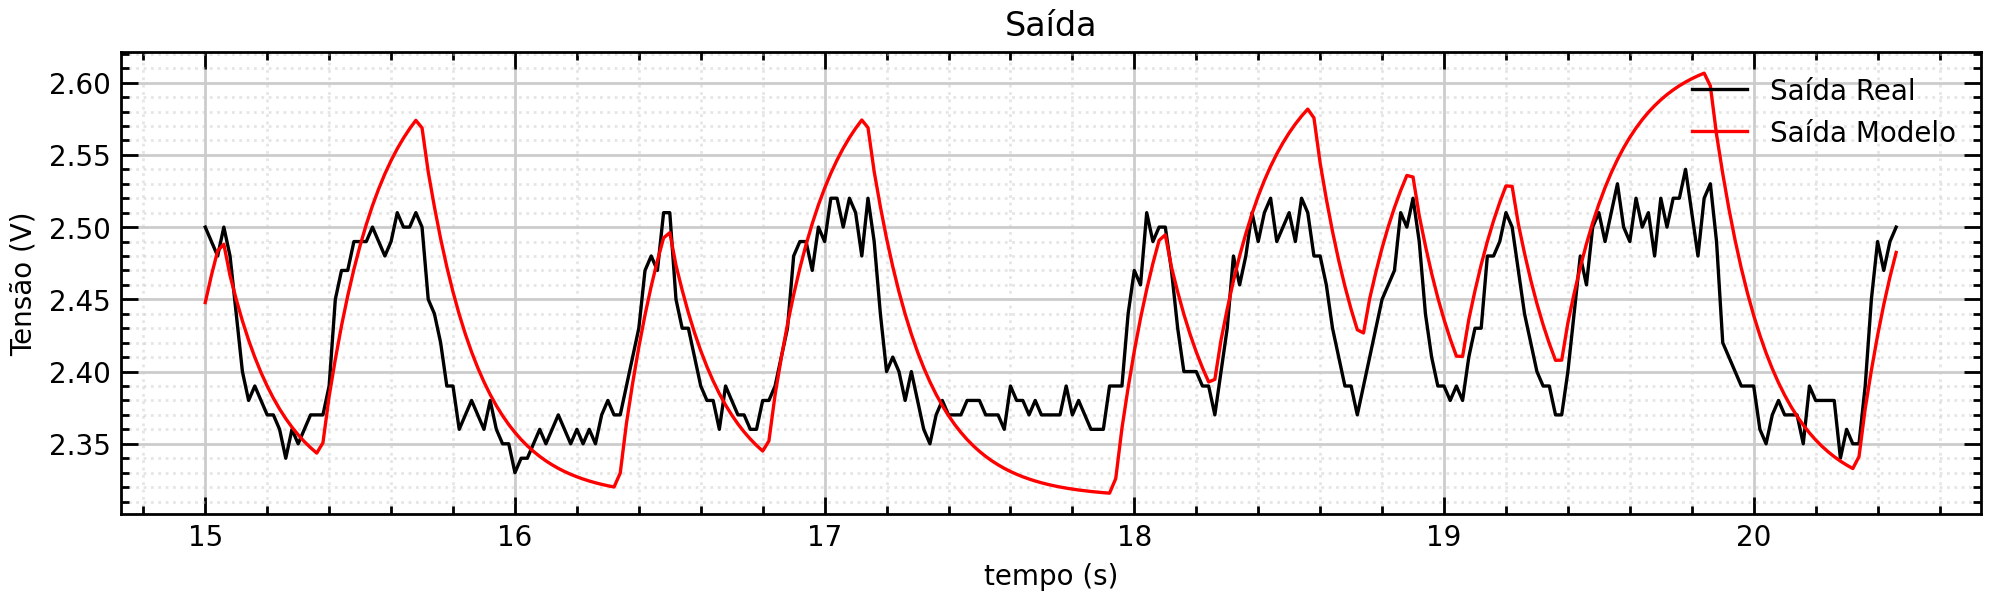

In [469]:
plt.figure(figsize=(12, 3))
plt.plot(t_test[50:], ytest[50:], '-k', linewidth=1.2)
plt.plot(t_test[50:], y_hat[50:], '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='upper right', labels=('Saída Real', 'Saída Modelo'))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()


Erro médio quadrático: 0.001973



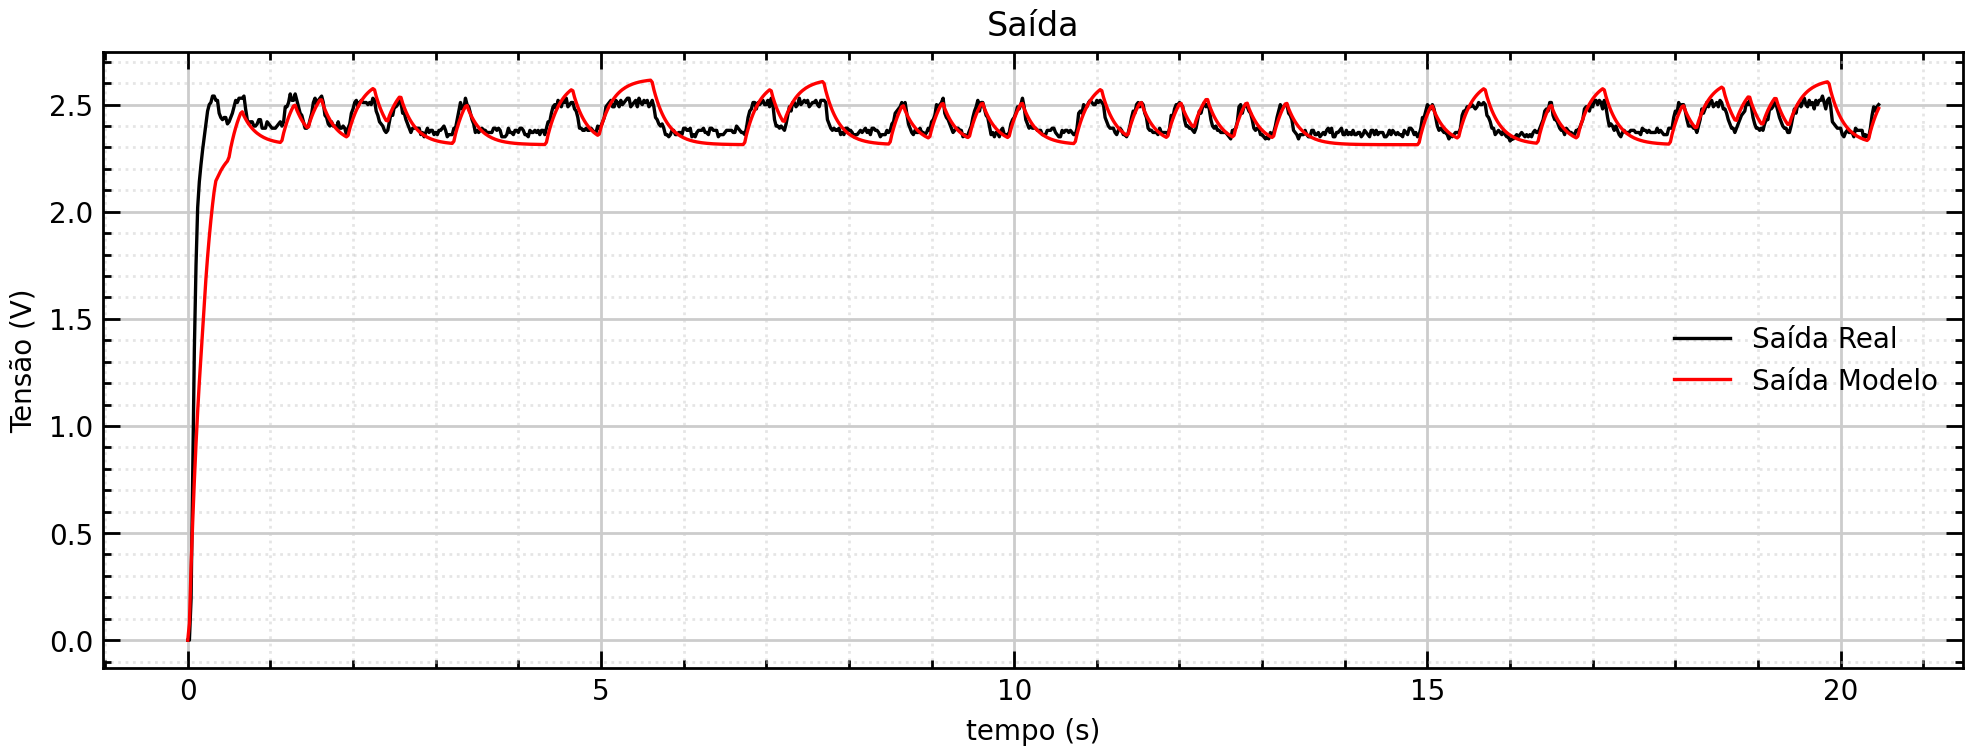

In [470]:
y_saida = ct.forced_response(Gz, U=sinal_entrada)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(sinal_saida[50:], y_saida[50:])
print('\nErro médio quadrático: %.6f\n' % MSE)

plt.figure(figsize=(12, 4))
plt.plot(tempo, sinal_saida, '-k', linewidth=1.2)
plt.plot(tempo, y_saida, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='center right', labels=('Saída Real', 'Saída Modelo'))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()


### Resposta ao Degrau unitário

In [471]:
### Resposta ao Degrau unitário
ct.step_info(Gz)

{'RiseTime': 0.3799999999999935,
 'SettlingTime': 0.699999999999988,
 'SettlingMin': 0.27902140798357356,
 'SettlingMax': 0.3084004867134679,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.30840048671346776,
 'PeakTime': 6.0199999999998965,
 'SteadyStateValue': 0.3084004867134679}

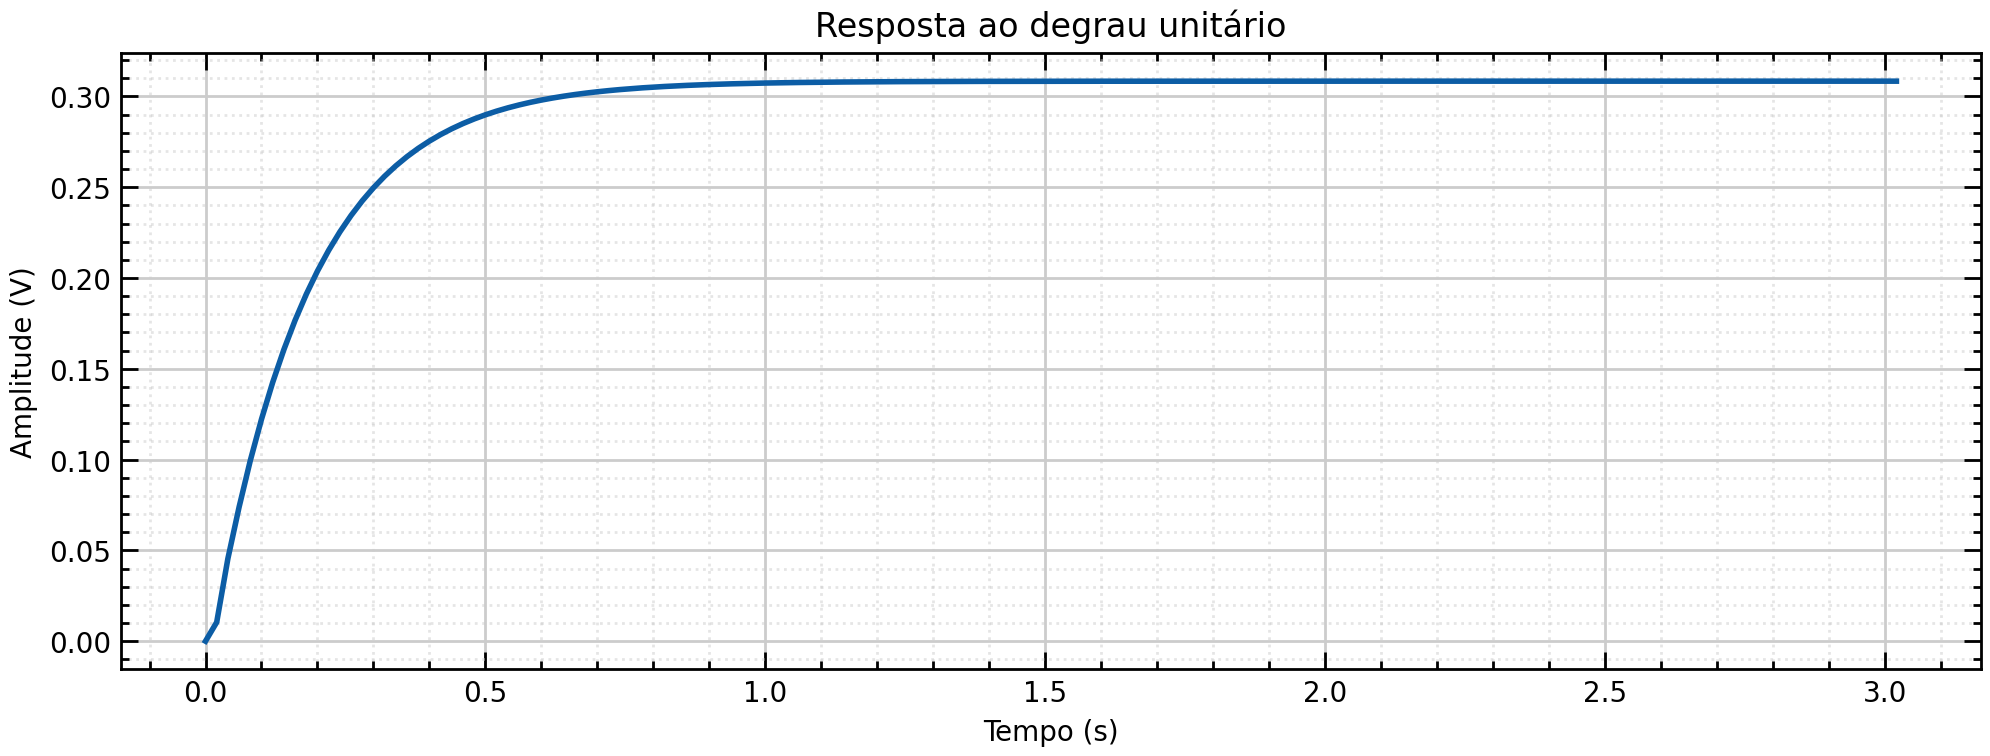

In [472]:
t, y = ct.step_response(Gz, 3)

plt.figure(figsize=(12, 4))
plt.plot(t, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (V)")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.show()

---

<br>

## 2. N = 2 e M = 1, sistema segunda ordem;


$$ H(z) = \frac{b_0+b_1z^{-1}}{1+a_1z^{-1}+a_2z^{-2}} \tag{9}$$

Observe que $M=1$ é adotado.

Novamente, desatca-se que considera-se $b_0 = 0$, isso fará com que a função de transferência não tenha zeros finitos. Logo, temos:

$$ H(z) = \frac{b_1z^{-1}}
{1+a_1z^{-1}+a_2z^{-2}} \tag{10}$$

expressando na forma de equação de diferenças:

$$ y[n] = - a_1y[n-1] - a_2y[n-2] + b_1x[n-1] \tag{11} $$

Dessa forma, já podemos desenvolver o código para calcular os coeficientes.

In [473]:
# Variável tempo discreto (amostras)
k = np.arange(1, len(xtrain))

# Matriz de Regressores (Primeira Ordem)
PSI = np.array([-ytrain[k-1], -ytrain[k-2], xtrain[k-1]]).T

# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Separando os coeficientes
a1, a2, b1= teta

# Numerador de H(z)
B = [b1]

# Denominador de H(z)
A = [1, a1, a2]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo))
print('Período de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z)=")
Gz

Período de Amostragem: 0.019999999999999657

 G(z)=


TransferFunction(array([0.02936242]), array([ 1.        , -0.8712469 , -0.03354205]), 0.019999999999999657)

In [474]:
print(f"\nZero do sistema: {ct.zeros(Gz)}")
print(f"Polo do sistema: {ct.poles(Gz)}\n")


Zero do sistema: []
Polo do sistema: [ 0.90818016+0.j -0.03693326+0.j]



Ao analisar os polos do sistema, podemos constatar que o sistema é estável já que os polos se encontram dentro do circulo unitário.

In [475]:
y_hat = resposta_forcada_e_mse(Gz)


Erro médio quadrático: 0.002080



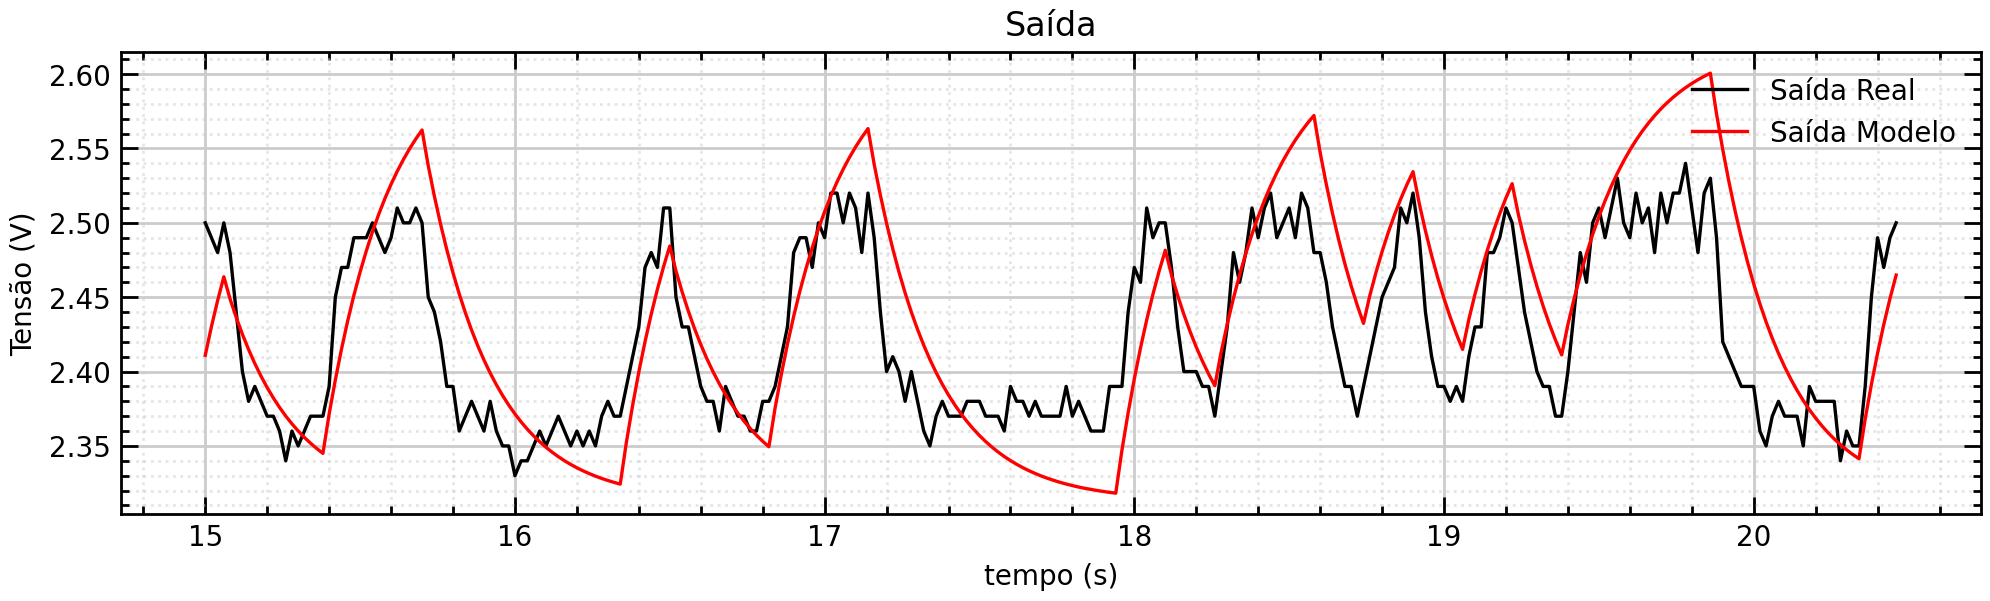

In [476]:
plt.figure(figsize=(12, 3))
plt.plot(t_test[50:], ytest[50:], '-k', linewidth=1.2)
plt.plot(t_test[50:], y_hat[50:], '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='upper right', labels=('Saída Real', 'Saída Modelo'))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()

### Resposta ao Degrau unitário

In [477]:
### Resposta ao Degrau unitário
ct.step_info(Gz)

{'RiseTime': 0.4399999999999925,
 'SettlingTime': 0.8399999999999856,
 'SettlingMin': 0.277937098637421,
 'SettlingMax': 0.3083930151077895,
 'Overshoot': 9.0000662323457e-14,
 'Undershoot': 0,
 'Peak': 0.3083930151077895,
 'PeakTime': 7.159999999999878,
 'SteadyStateValue': 0.3083930151077892}

### Resposta ao Degrau unitário


In [ ]:
### Resposta ao Degrau unitário
ct.step_info(Gz)

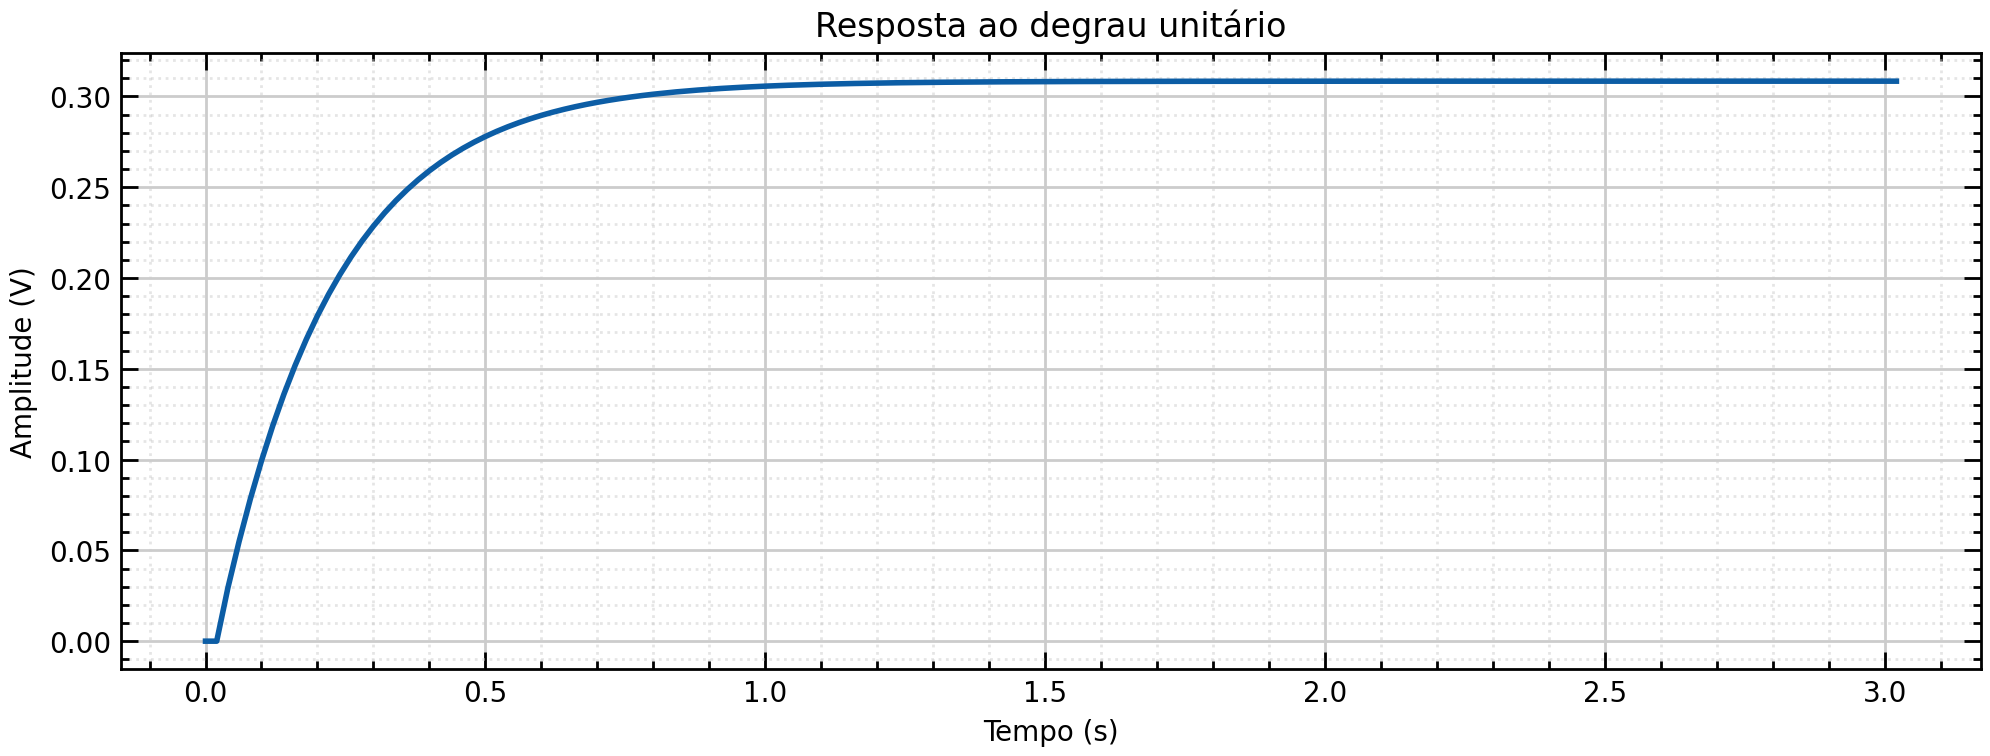

In [478]:
t, y = ct.step_response(Gz, 3)

plt.figure(figsize=(12, 4))
plt.plot(t, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (V)")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.show()

---

<br>

## 3. N = 3 e M = 3, sistema terceira ordem;


$$ H(z) = \frac{b_0+b_1z^{-1}+b_2z^{-2}+b_3z^{-3}}
{1+a_1z^{-1}+a_2z^{-2}+a_3z^{-3}} \tag{9}$$

Observe que $M=1$ é adotado.

Novamente, desatca-se que considera-se $b_0 = 0$, isso fará com que a função de transferência não tenha zeros finitos. Logo, temos:

$$ H(z) = \frac{b_1z^{-1}+b_2z^{-2}+b_3z^{-3}}
{1+a_1z^{-1}+a_2z^{-2}+a_3z^{-3}} \tag{10}$$

expressando na forma de equação de diferenças:

$$ y[n] = - a_1y[n-1] - a_2y[n-2]  - a_3y[n-3] + b_1x[n-1] + b_2x[n-2] + b_3x[n-3] \tag{11} $$

Dessa forma, já podemos desenvolver o código para calcular os coeficientes.

In [479]:
# Variável tempo discreto (amostras)
k = np.arange(1, len(xtrain))

# Matriz de Regressores (Primeira Ordem)
PSI = np.array([-ytrain[k-1], -ytrain[k-2], -ytrain[k-3], xtrain[k-1], xtrain[k-2], xtrain[k-3]]).T

# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Separando os coeficientes
a1, a2, a3, b1, b2, b3 = teta

# Numerador de H(z)
B = [b1, b2, b3]

# Denominador de H(z)
A = [1, a1, a2, a3]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo))
print('Período de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z)=")
Gz

Período de Amostragem: 0.019999999999999657

 G(z)=


TransferFunction(array([0.01119482, 0.02581872, 0.00385613]), array([ 1.00000000e+00, -7.60320102e-01,  8.02232906e-04, -1.07968957e-01]), 0.019999999999999657)

In [480]:
print(f"\nZero do sistema: {ct.zeros(Gz)}")
print(f"Polo do sistema: {ct.poles(Gz)}\n")


Zero do sistema: [-2.1457824 +0.j -0.16052738+0.j]
Polo do sistema: [ 0.89439428+0.j         -0.06703709+0.34091558j -0.06703709-0.34091558j]



Ao analisar os polos do sistema, podemos constatar que o sistema é estável já que os polos se encontram dentro do circulo unitário.

In [481]:
ct.damp(Gz);

_____Eigenvalue______ Damping___ Frequency_
    0.8944                     1    -0.8944
  -0.06704   +0.3409j     0.5138      102.9
  -0.06704   -0.3409j     0.5138      102.9


In [482]:
y_hat = resposta_forcada_e_mse(Gz)


Erro médio quadrático: 0.001883



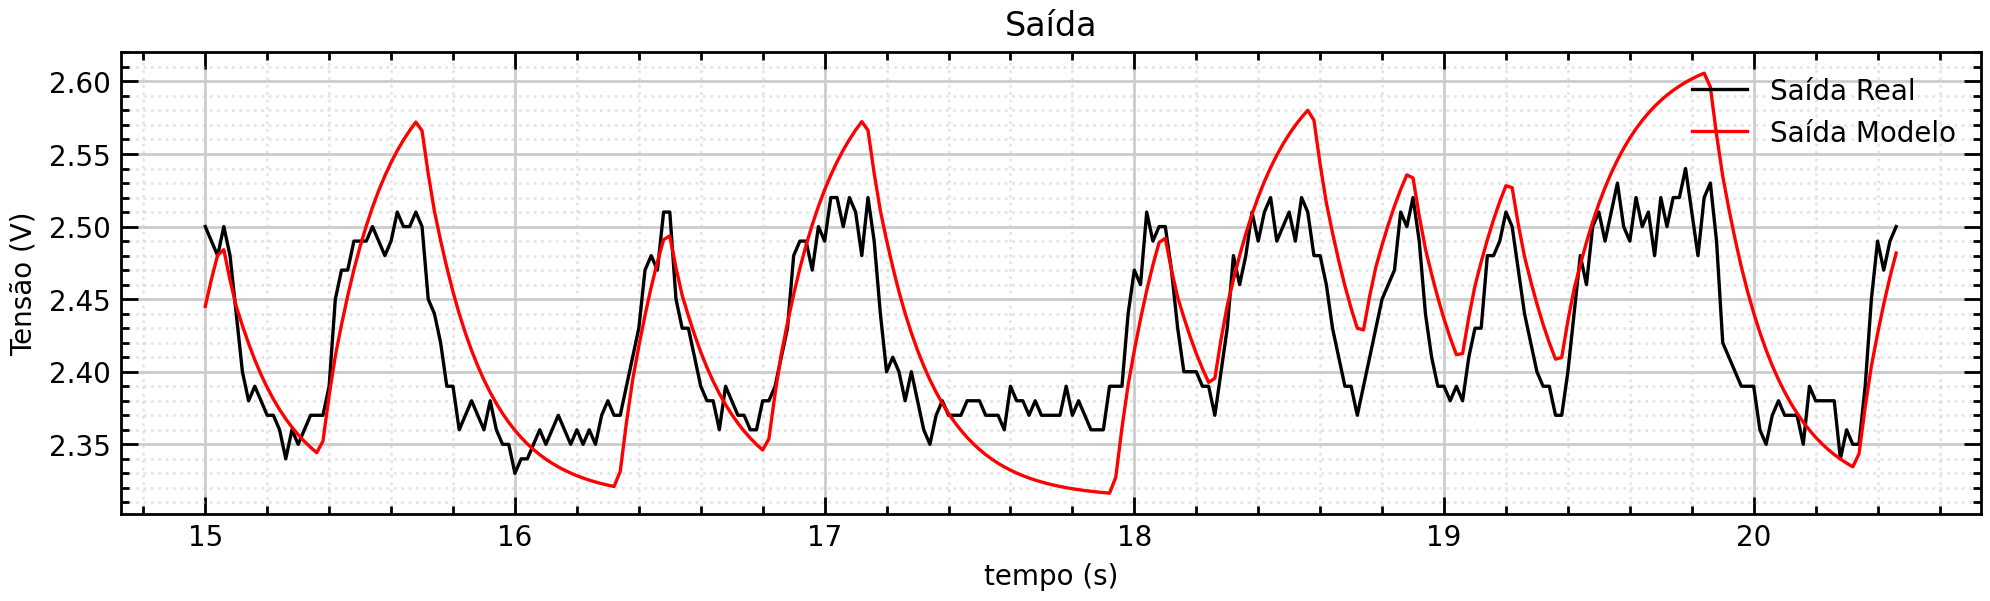

In [483]:
plt.figure(figsize=(12, 3))
plt.plot(t_test[50:], ytest[50:], '-k', linewidth=1.2)
plt.plot(t_test[50:], y_hat[50:], '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='upper right', labels=('Saída Real', 'Saída Modelo'))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()


Erro médio quadrático: 0.001923



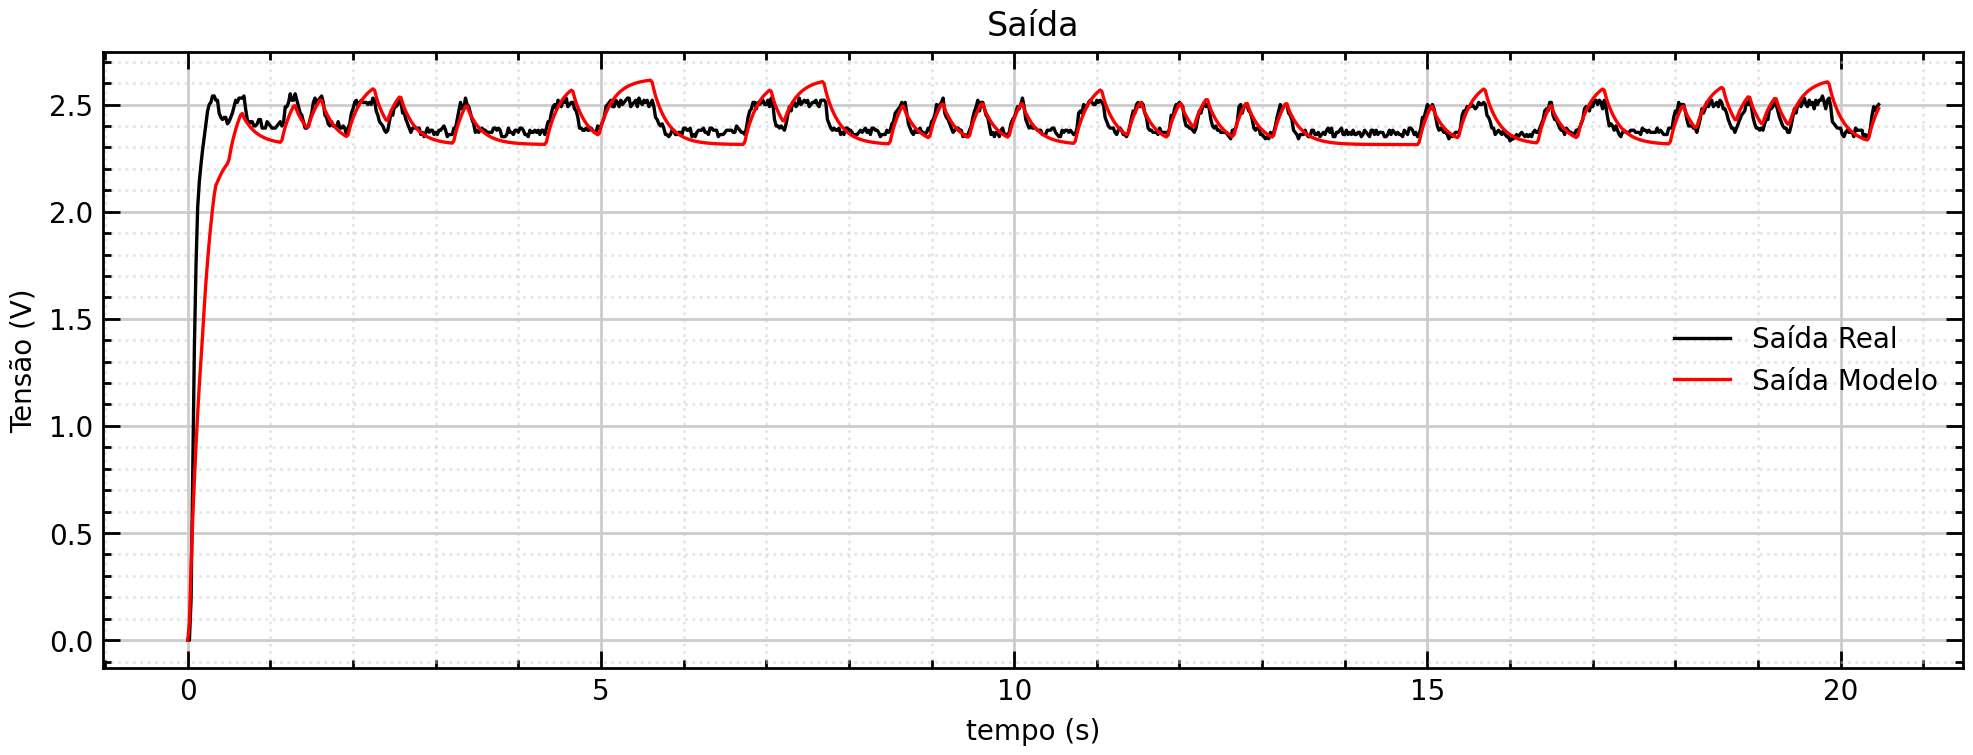

In [484]:
y_saida = ct.forced_response(Gz, U=sinal_entrada)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(sinal_saida[50:], y_saida[50:])
print('\nErro médio quadrático: %.6f\n' % MSE)

plt.figure(figsize=(12, 4))
plt.plot(tempo, sinal_saida, '-k', linewidth=1.2)
plt.plot(tempo, y_saida, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='center right', labels=('Saída Real', 'Saída Modelo'))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()


### Resposta ao Degrau unitário

In [ ]:
### Resposta ao Degrau unitário
ct.step_info(Gz)

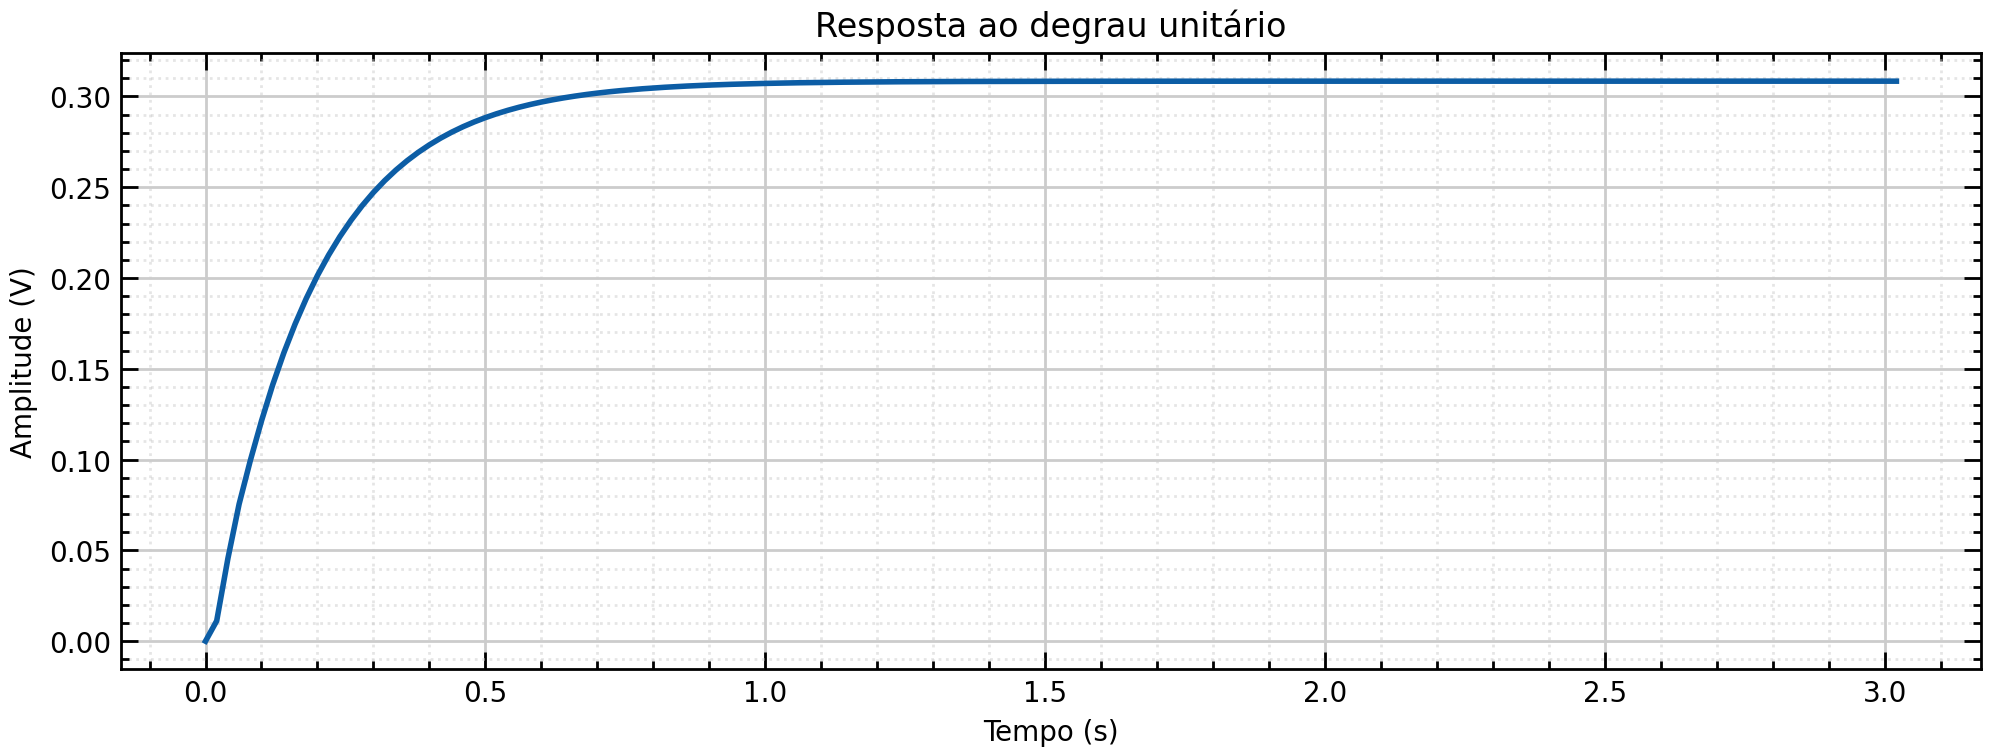

In [485]:
t, y = ct.step_response(Gz, 3)

plt.figure(figsize=(12, 4))
plt.plot(t, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (V)")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.show()

---

## 4. N = 3 e M = 2, sistema terceira ordem;


$$ H(z) = \frac{b_0+b_1z^{-1}+b_2z^{-2}}
{1+a_1z^{-1}+a_2z^{-2}+a_3z^{-3}} \tag{9}$$

Observe que $M=1$ é adotado.

Novamente, desatca-se que considera-se $b_0 = 0$, isso fará com que a função de transferência não tenha zeros finitos. Logo, temos:

$$ H(z) = \frac{b_1z^{-1}+b_2z^{-2}}
{1+a_1z^{-1}+a_2z^{-2}+a_3z^{-3}} \tag{10}$$

expressando na forma de equação de diferenças:

$$ y[n] = - a_1y[n-1] - a_2y[n-2]  - a_3y[n-3] + b_1x[n-1] + b_2x[n-2] \tag{11} $$

Dessa forma, já podemos desenvolver o código para calcular os coeficientes.

In [486]:
# Variável tempo discreto (amostras)
k = np.arange(1, len(xtrain))

# Matriz de Regressores (Primeira Ordem)
PSI = np.array([-ytrain[k-1], -ytrain[k-2], -ytrain[k-3], xtrain[k-1], xtrain[k-2]]).T

# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Separando os coeficientes
a1, a2, a3, b1, b2= teta

# Numerador de H(z)
B = [b1, b2]

# Denominador de H(z)
A = [1, a1, a2, a3]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo))
print('Período de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z)=")
Gz

Período de Amostragem: 0.019999999999999657

 G(z)=


TransferFunction(array([0.01081019, 0.02845654]), array([ 1.00000000e+00, -7.74362659e-01, -5.39828661e-04, -9.77810273e-02]), 0.019999999999999657)

In [487]:
print(f"\nZero do sistema: {ct.zeros(Gz)}")
print(f"Polo do sistema: {ct.poles(Gz)}\n")


Zero do sistema: [-2.63238202+0.j]
Polo do sistema: [ 0.89659948+0.j         -0.06111841+0.32453379j -0.06111841-0.32453379j]



In [488]:
y_hat = resposta_forcada_e_mse(Gz)


Erro médio quadrático: 0.002424



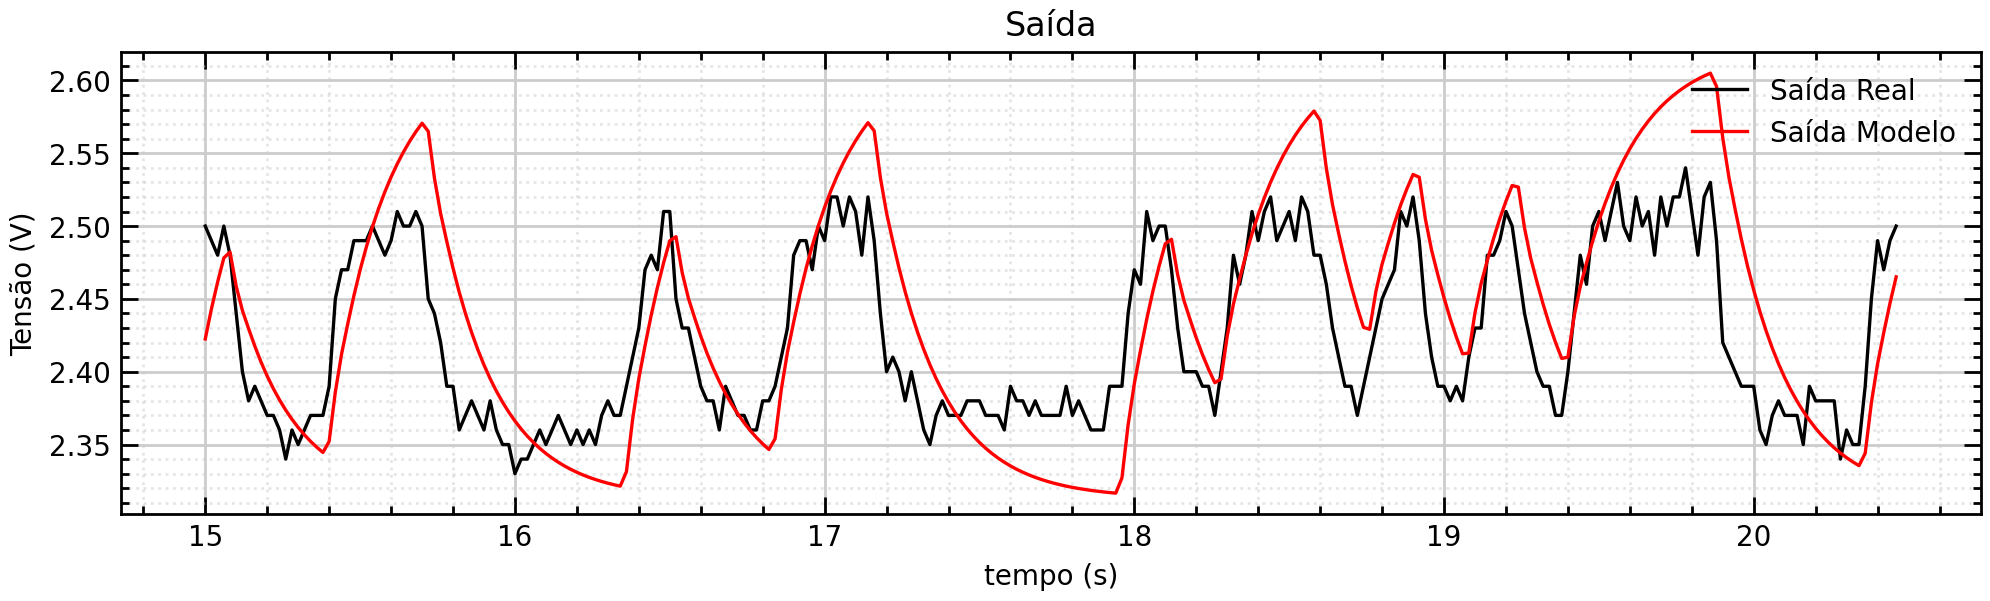

In [489]:
plt.figure(figsize=(12, 3))
plt.plot(t_test[50:], ytest[50:], '-k', linewidth=1.2)
plt.plot(t_test[50:], y_hat[50:], '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='upper right', labels=('Saída Real', 'Saída Modelo'))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()


Erro médio quadrático: 0.002432



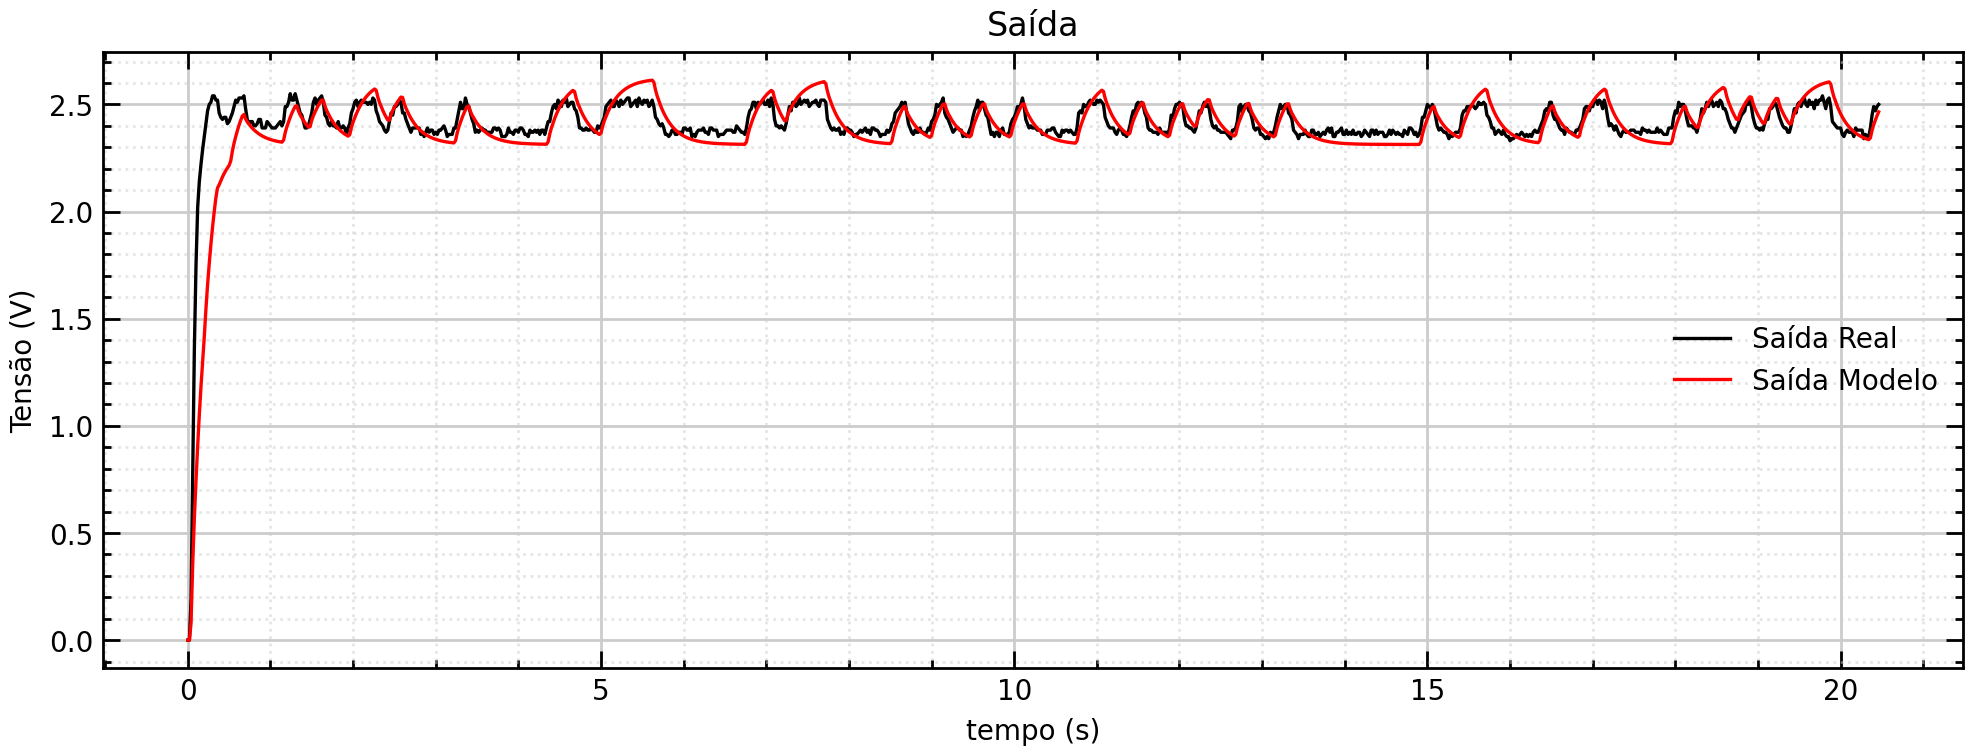

In [490]:
y_saida = ct.forced_response(Gz, U=sinal_entrada)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(sinal_saida[50:], y_saida[50:])
print('\nErro médio quadrático: %.6f\n' % MSE)

plt.figure(figsize=(12, 4))
plt.plot(tempo, sinal_saida, '-k', linewidth=1.2)
plt.plot(tempo, y_saida, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='center right', labels=('Saída Real', 'Saída Modelo'))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplots_adjust(hspace=0.5)
plt.show()


### Resposta ao Degrau unitário


In [492]:
### Resposta ao Degrau unitário
ct.step_info(Gz)

{'RiseTime': 0.39999999999999314,
 'SettlingTime': 0.7599999999999869,
 'SettlingMin': 0.2791064650844639,
 'SettlingMax': 0.3084182485998207,
 'Overshoot': 1.1699128849906511e-12,
 'Undershoot': 0,
 'Peak': 0.3084182485998207,
 'PeakTime': 6.39999999999989,
 'SteadyStateValue': 0.3084182485998171}

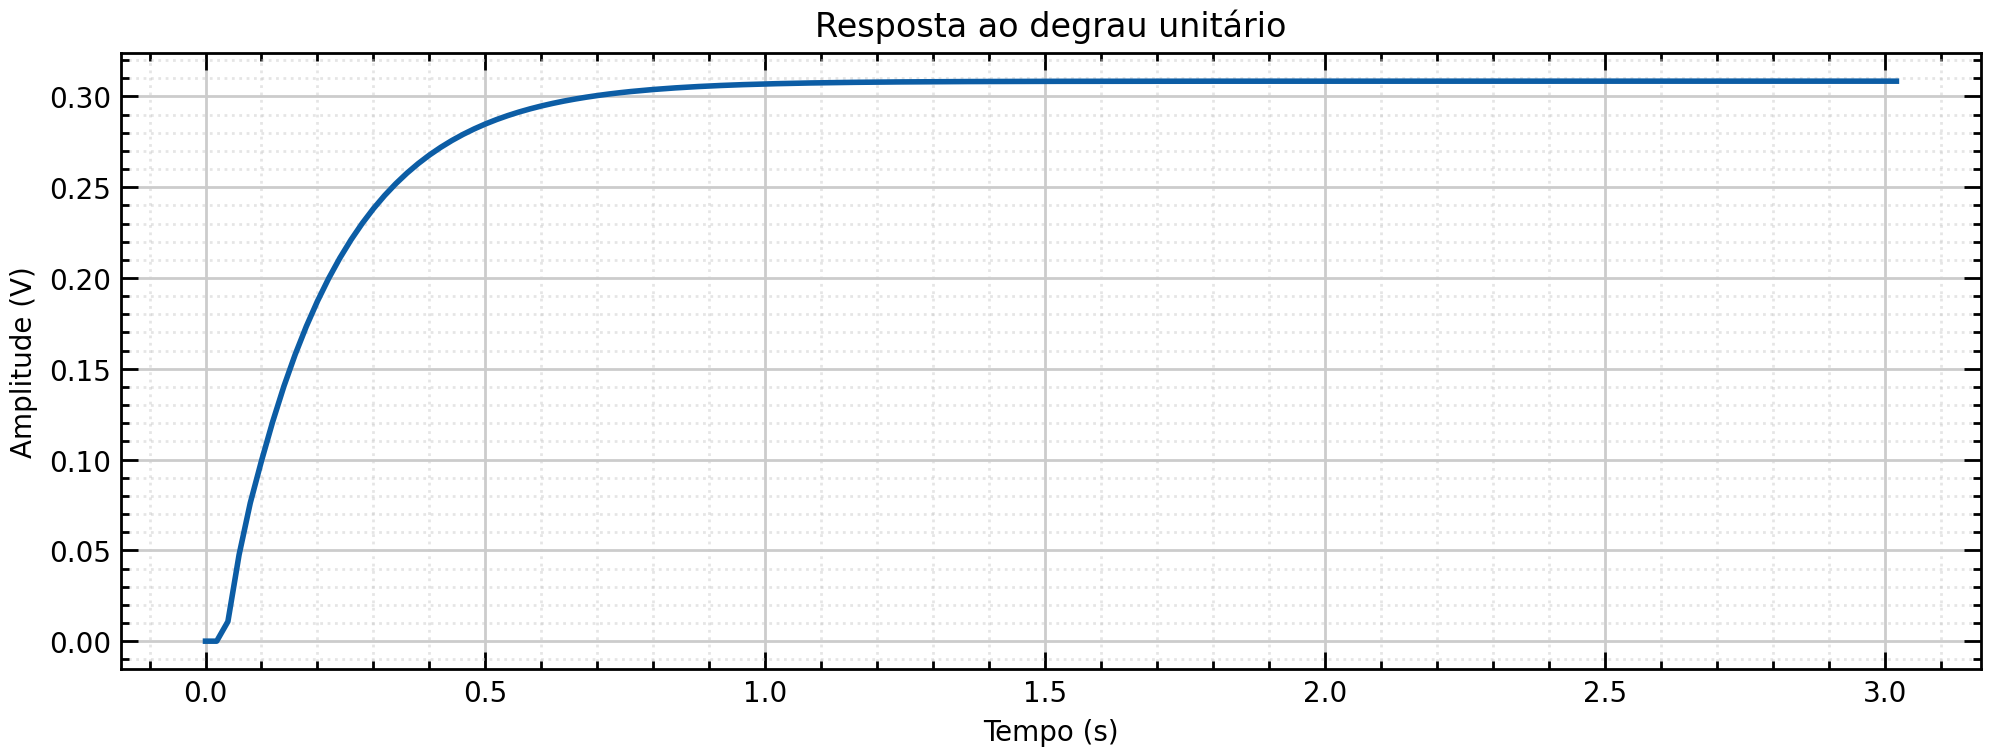

In [491]:
t, y = ct.step_response(Gz, 3)

plt.figure(figsize=(12, 4))
plt.plot(t, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (V)")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.show()

---

# CONCLUSÃO

O método de itentificação de sistemas por função de transferência pulsada foi exitosa, já que os passos para realizar o procedimento foram realizados e no final foi possível encontrar modelos que ao valida-los obteve-se erro pequeno, além disso, todos os modelos encontrados são estável e com características de resposta parecidas, assim, pode-se afirmar que o sistema motor/gerador foi modelado a partir da técnica apresentada com uma aproximação relativamente boa.